In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'Dataset\Train.csv')
test_df = pd.read_csv(r'Dataset\Test.csv')
ss_df = pd.read_csv(r'Dataset\SampleSubmission.csv')
weather_df = pd.read_csv(r'Dataset\Weather.csv')

In [3]:
df.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,000FLWA8,2019-12-04T20:01:50Z,3.258,36.777,3.003,36.718,39627,2784
1,000RGOAM,2019-12-10T22:37:09Z,3.087,36.707,3.081,36.727,3918,576
2,001QSGIH,2019-11-23T20:36:10Z,3.144,36.739,3.088,36.742,7265,526
3,002ACV6R,2019-12-01T05:43:21Z,3.239,36.784,3.054,36.763,23350,3130
4,0039Y7A8,2019-12-17T20:30:20Z,2.912,36.707,3.207,36.698,36613,2138


## Variable Descriptions

- 'ID' - A unique ID
- 'Timestamp' - Time that the trip was started
- 'Origin_lat', 'Origin_lon' - Origin (in degrees latitude and longitude)
- 'Destination_lat', 'Destination_lon' - Destination
- 'Trip_distance' - Distance in meters on a driving route
- 'ETA' - Estimated trip time in seconds

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               83924 non-null  object 
 1   Timestamp        83924 non-null  object 
 2   Origin_lat       83924 non-null  float64
 3   Origin_lon       83924 non-null  float64
 4   Destination_lat  83924 non-null  float64
 5   Destination_lon  83924 non-null  float64
 6   Trip_distance    83924 non-null  int64  
 7   ETA              83924 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ MB


In [5]:
df['Timestamp'] = df['Timestamp'].str.replace('[TZ]', '', regex=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d%H:%M:%S')
df.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,000FLWA8,2019-12-04 20:01:50,3.258,36.777,3.003,36.718,39627,2784
1,000RGOAM,2019-12-10 22:37:09,3.087,36.707,3.081,36.727,3918,576
2,001QSGIH,2019-11-23 20:36:10,3.144,36.739,3.088,36.742,7265,526
3,002ACV6R,2019-12-01 05:43:21,3.239,36.784,3.054,36.763,23350,3130
4,0039Y7A8,2019-12-17 20:30:20,2.912,36.707,3.207,36.698,36613,2138


In [6]:
df.shape

(83924, 8)

<Axes: xlabel='Origin_lat', ylabel='Origin_lon'>

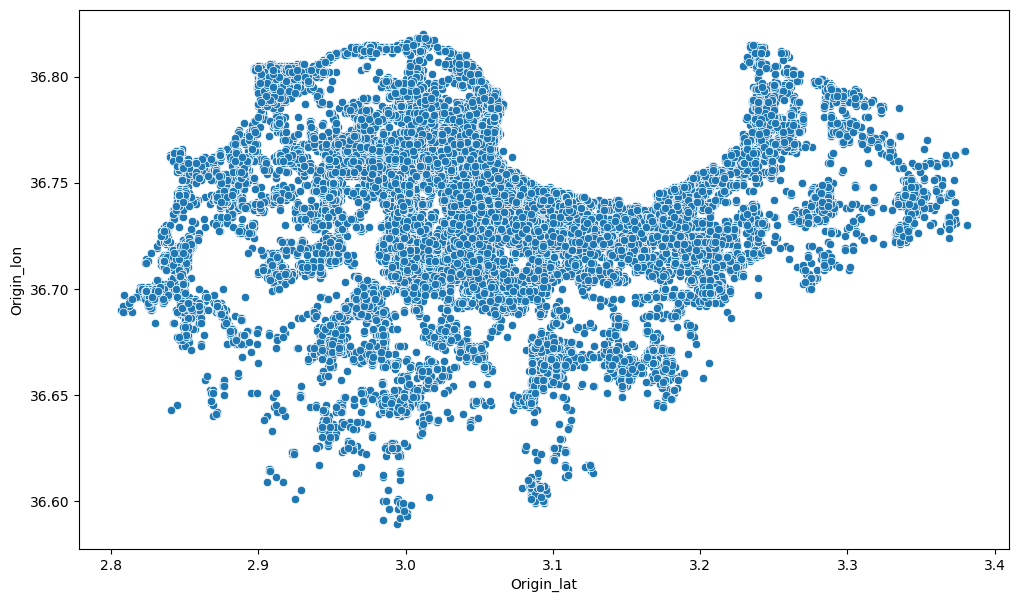

In [8]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x="Origin_lat", y="Origin_lon")

<Axes: xlabel='Destination_lat', ylabel='Destination_lon'>

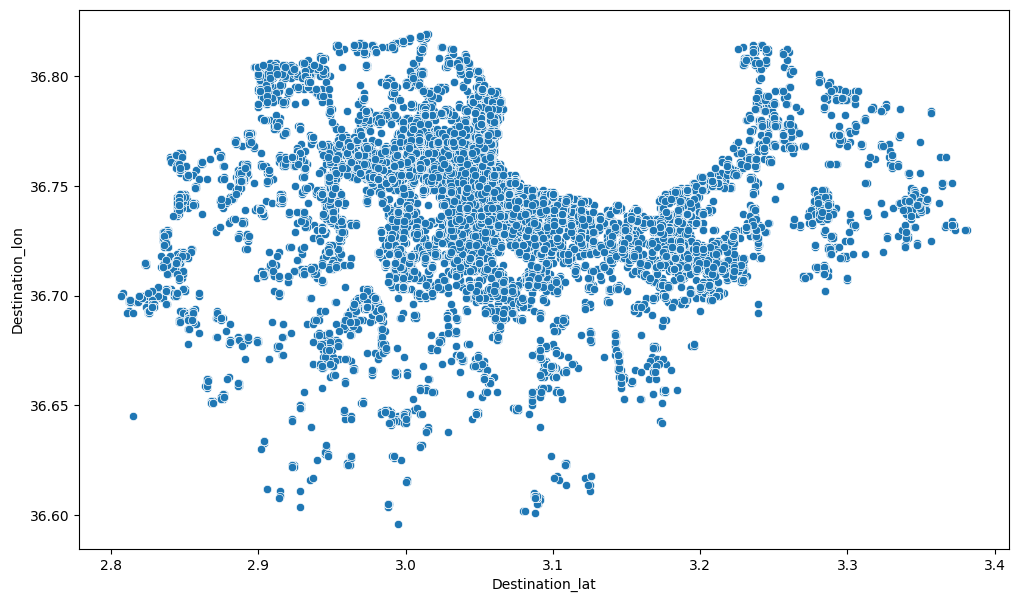

In [9]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x="Destination_lat", y="Destination_lon")

In [10]:
# First, engineering a lat + long column
df['GEOM'] = df['Origin_lat'].map(str) + ',' + df['Origin_lon'].map(str)
df['GEOM'][0:2]

0    3.258,36.777
1    3.087,36.707
Name: GEOM, dtype: object

In [18]:
from geopy.geocoders import Nominatim

# Use the geopy locator with Nominatim/OpenStreetMaps
locator = Nominatim(user_agent='myGeoencoder')
coordinates = ['3.258,36.777']
location = locator.reverse(coordinates)
location.raw

{'place_id': 68676983,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 198507881,
 'lat': '3.2580337654742446',
 'lon': '36.78034168388619',
 'class': 'highway',
 'type': 'unclassified',
 'place_rank': 26,
 'importance': 0.10000999999999993,
 'addresstype': 'road',
 'name': '',
 'display_name': 'North Horr, Marsabit, Eastern, Kenya',
 'address': {'village': 'North Horr',
  'county': 'North Horr',
  'state': 'Marsabit',
  'ISO3166-2-lvl4': 'KE-25',
  'country': 'Kenya',
  'country_code': 'ke'},
 'boundingbox': ['3.1638051', '3.3438366', '36.7788893', '36.7984563']}

In [8]:
# df.corr(numeric_only=True)['ETA'].sort_values(ascending=False)

ETA                1.000000
Trip_distance      0.897972
Destination_lat    0.048741
Origin_lat         0.037180
Origin_lon        -0.050174
Destination_lon   -0.074390
Name: ETA, dtype: float64

In [15]:
weather_df.head()

,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,2019-11-01,290.630524,296.434662,294.125061,101853.617188,292.503998,100806.351562,0.004297,3.561323,0.941695
1,2019-11-02,289.135284,298.432404,295.551666,101225.164062,293.337921,100187.250000,0.001767,5.318593,3.258237
2,2019-11-03,287.667694,296.612122,295.182831,100806.617188,293.674316,99771.414062,0.000797,8.447649,3.172982
3,2019-11-04,287.634644,297.173737,294.368134,101240.929688,292.376221,100200.843750,0.000393,5.991428,2.236700
4,2019-11-05,286.413788,294.284851,292.496979,101131.750000,289.143066,100088.500000,0.004658,6.962730,2.655364


In [16]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        61 non-null     object 
 1   dewpoint_2m_temperature     61 non-null     float64
 2   maximum_2m_air_temperature  61 non-null     float64
 3   mean_2m_air_temperature     61 non-null     float64
 4   mean_sea_level_pressure     61 non-null     float64
 5   minimum_2m_air_temperature  61 non-null     float64
 6   surface_pressure            61 non-null     float64
 7   total_precipitation         61 non-null     float64
 8   u_component_of_wind_10m     61 non-null     float64
 9   v_component_of_wind_10m     61 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.9+ KB
